# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [55]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestRegressor as RFR  

from sklearn.model_selection import train_test_split as tts

## Regression Model Evaluation

In [56]:

data = pd.read_csv('C:/Users/luiso/IRONHACK/7.2-lab_supervised_model_evaluation/fetch_california_housing.csv')

data.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
X = data.drop('MEDV', axis=1)

y = data.MEDV

In [58]:
# hacer esto con el dataset de fetch_california_housing


#X = pd.DataFrame(data["data"], columns=data["feature_names"])
#y = pd.DataFrame(data["target"], columns=['MEDV'])

#data1 = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [59]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [72]:
# Entrenar con LinearRegression el modelo

from sklearn.linear_model import LinearRegression as LR

lr = LR()

lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9254694483890455, 0.9389329915756829)

## 3. Calculate and print R-squared for both the training and the testing set.

In [61]:
# Calculamos el R2 del modelo

from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.575787706032451

## 4. Calculate and print mean squared error for both the training and the testing set.

In [62]:
# Calculamos el MSE del modelo

from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)


0.5558915986952442

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [63]:
# Calculamos el MAE del modelo

from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

0.5332001304956552

## Classification Model Evaluation

In [64]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [76]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [113]:
# Entrenamos con LogisticRegression el modelo

from sklearn.linear_model import LogisticRegression as LogR

logr = LogR()

logr.fit(X_train, y_train)

logr.score(X_train, y_train), logr.score(X_test, y_test)

(0.9833333333333333, 0.9333333333333333)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [114]:
# calculamos el accuracy del modelo

from sklearn.metrics import accuracy_score

y_pred = logr.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [115]:
# calculamos el balanced accuracy del modelo

from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9465811965811967

## 10. Calculate and print the precision score for both the training and the testing set.

In [116]:
# calculamos el precision del modelo

from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average='micro')

0.9333333333333333

## 11. Calculate and print the recall score for both the training and the testing set.

In [117]:
# calculamos el recall del modelo

from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='micro')

0.9333333333333333

## 12. Calculate and print the F1 score for both the training and the testing set.

In [118]:
# calculamos el f1 del modelo

from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.9333333333333333

## 13. Generate confusion matrices for both the training and the testing set.

In [119]:
# calculamos la matriz de confusión del modelo

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 5,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]], dtype=int64)

<Axes: >

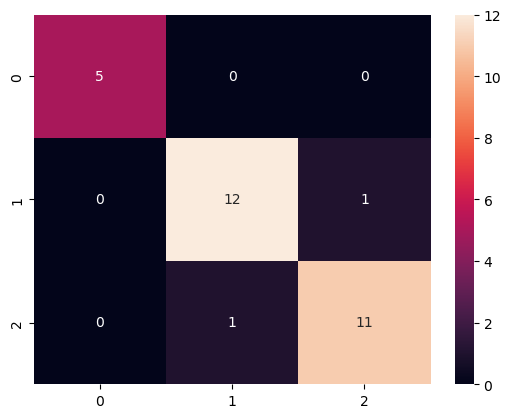

In [120]:
# hacemo un mapa de calor de la matriz de confusión

import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.